# Iris 데이터 과제

In [2]:
import numpy as np
import pandas as pd

%precision 2
pd.set_option("display.precision", 3)

In [3]:
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


sepal = 꽃받침  
petal = 꽃잎  
variety = 종

In [5]:
df["variety"].unique() # 3개의 종 확인 

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

## 1. 주어진 데이터의 공분산을 계산하세요.

In [15]:
# 비교 대상
idx_col = df.columns[:-1] # 종을 빼고 서로 비교

i = 1
for col1 in idx_col[:-1]:
    for col2 in idx_col[i:]:
        print(f"===== {col1}과 {col2}의 공분산 =====")
        print(np.cov(df[col1], df[col2], ddof = 0))
        print()
    i += 1

===== sepal.length과 sepal.width의 공분산 =====
[[ 0.68 -0.04]
 [-0.04  0.19]]

===== sepal.length과 petal.length의 공분산 =====
[[0.68 1.27]
 [1.27 3.1 ]]

===== sepal.length과 petal.width의 공분산 =====
[[0.68 0.51]
 [0.51 0.58]]

===== sepal.width과 petal.length의 공분산 =====
[[ 0.19 -0.33]
 [-0.33  3.1 ]]

===== sepal.width과 petal.width의 공분산 =====
[[ 0.19 -0.12]
 [-0.12  0.58]]

===== petal.length과 petal.width의 공분산 =====
[[3.1  1.29]
 [1.29 0.58]]



### ver2 DF 그대로 이용 

In [59]:
df.cov(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.686,-0.042,1.274,0.516
sepal.width,-0.042,0.190,-0.330,-0.122
petal.length,1.274,-0.330,3.116,1.296
petal.width,0.516,-0.122,1.296,0.581


## 2. 주어진 데이터의 상관계수를 계산하세요.

In [20]:
# 비교 대상
idx_col = df.columns[:-1] # 종을 빼고 서로 비교

i = 1
for col1 in idx_col[:-1]:
    for col2 in idx_col[i:]:
        print(f"===== {col1}과 {col2}의 공분산 =====")
        result = np.corrcoef(df[col1], df[col2])
        print(result)
        if abs(result[0, 1]) > 0.8:
            print("상관 있을 가능성 높음")
        print()
    
    i += 1

===== sepal.length과 sepal.width의 공분산 =====
[[ 1.   -0.12]
 [-0.12  1.  ]]

===== sepal.length과 petal.length의 공분산 =====
[[1.   0.87]
 [0.87 1.  ]]
상관 있을 가능성 높음

===== sepal.length과 petal.width의 공분산 =====
[[1.   0.82]
 [0.82 1.  ]]
상관 있을 가능성 높음

===== sepal.width과 petal.length의 공분산 =====
[[ 1.   -0.43]
 [-0.43  1.  ]]

===== sepal.width과 petal.width의 공분산 =====
[[ 1.   -0.37]
 [-0.37  1.  ]]

===== petal.length과 petal.width의 공분산 =====
[[1.   0.96]
 [0.96 1.  ]]
상관 있을 가능성 높음



### ver2 DF 그대로 이용

In [61]:
df.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000,-0.118,0.872,0.818
sepal.width,-0.118,1.000,-0.428,-0.366
petal.length,0.872,-0.428,1.000,0.963
petal.width,0.818,-0.366,0.963,1.000


## 3. 각 특성별로 히스토그램을 그려보세요.

In [21]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프가 notebook 위에 표시
%matplotlib inline

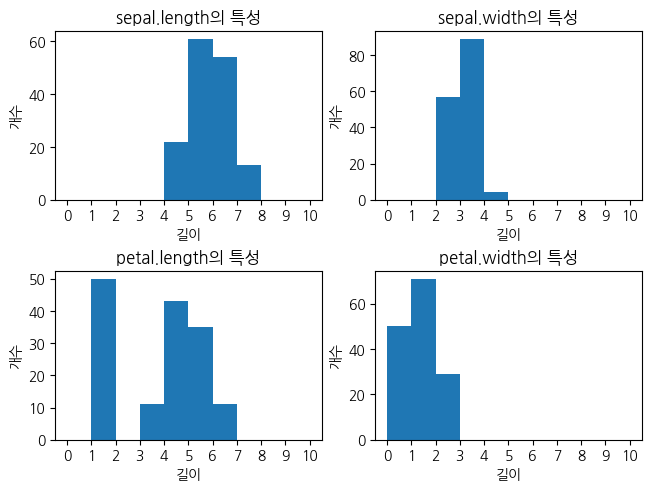

In [57]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(constrained_layout=True) # 글자 겹침 방지 

plot_num = 1
# idx_col을 for문으로 돌려
for spec in idx_col:
    # 켄버스 위에 그래프를 그리기 위한 영역을 지정
    # 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
    plot_info = int(f"22{plot_num}")
    ax = fig.add_subplot(plot_info)
    
    # 계급수를 13으로 하여 히스토그램을 그림
    freq, a, _ = ax.hist(df[spec], bins=10, range=(0, 10))
    # X축에 레이블 부여
    ax.set_xlabel('길이')
    # Y축에 레이블 부여
    ax.set_ylabel('개수')
    # X축을 0, 10, 20, ..., 100 눈금으로 구분
    ax.set_xticks(np.linspace(0, 10, 11))
    # Y축을 0, 1, 2, ...의 눈금으로 구분
    # ax.set_yticks(np.arange(0, freq.max()+1))
    ax.set_title(f"{spec}의 특성")
    # 그래프 표시
    
    plot_num += 1
plt.show()

## 4. 각 품종별로 특성(꽃받침길이, 꽃받침너비, 꽃잎길이, 꽃잎너비)에 대한 상자 그림(boxplot)을 그려보세요

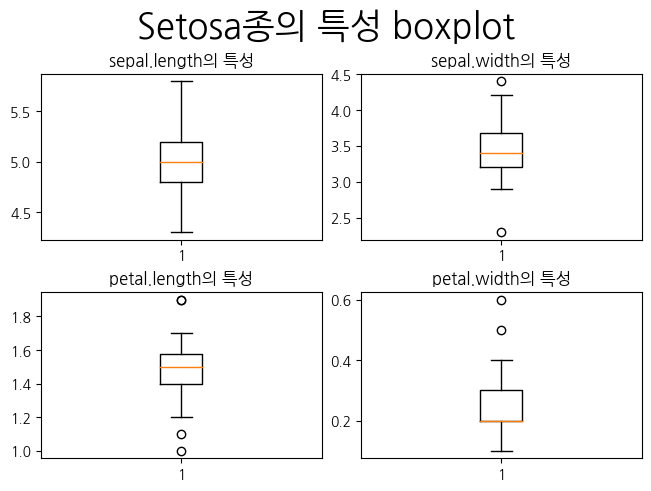

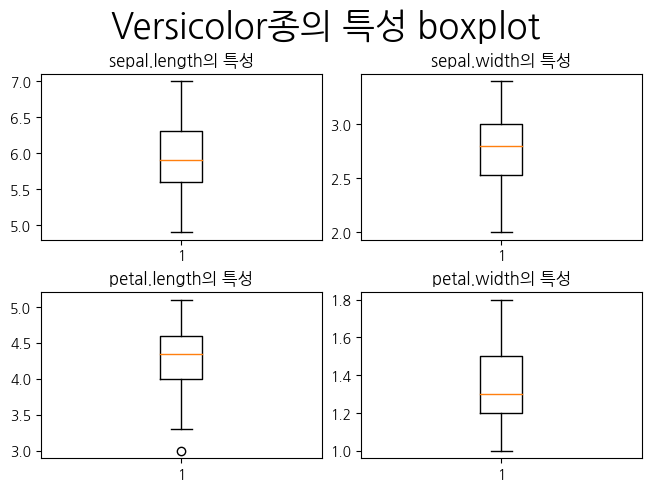

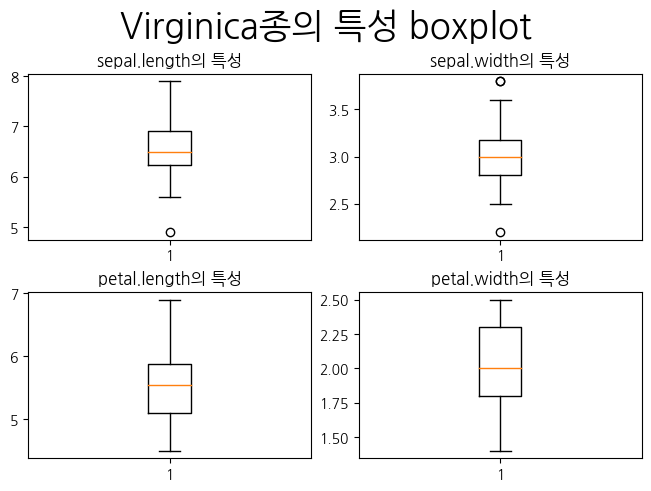

In [39]:
# 품종 => ['Setosa', 'Versicolor', 'Virginica']
for kind in df["variety"].unique():
    kind_df = df[df["variety"] == kind] # 각 종으로만 이루어진 df 생성
    
    fig = plt.figure(constrained_layout=True) # 글자 겹침 방지 
    
    plot_num = 1
    # idx_col을 for문으로 돌려
    for spec in idx_col:
        # 켄버스 위에 그래프를 그리기 위한 영역을 지정
        # 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
        plot_info = int(f"22{plot_num}")
        ax = fig.add_subplot(plot_info)
        
        # 계급수를 13으로 하여 히스토그램을 그림
        ax.boxplot(kind_df[spec])
        # X축에 레이블 부여
        # ax.set_xlabel('가격 [$]')
        # Y축에 레이블 부여
        # ax.set_ylabel('개수')
        # X축을 0, 10, 20, ..., 100 눈금으로 구분
        # ax.set_xticks(np.linspace(0, 10, 11))
        # Y축을 0, 1, 2, ...의 눈금으로 구분
        # ax.set_yticks(np.arange(0, freq.max()+1))
        ax.set_title(f"{spec}의 특성")
        # 그래프 표시
        
        plot_num += 1
    plt.suptitle(f"{kind}종의 특성 boxplot", fontsize = 25)
    plt.show()

## 5. 각 품종별로 꽃받침 길이와 꽃받침 너비의 관계를 산점도로 나타내고, 색상으로 품종을 구분하세요.

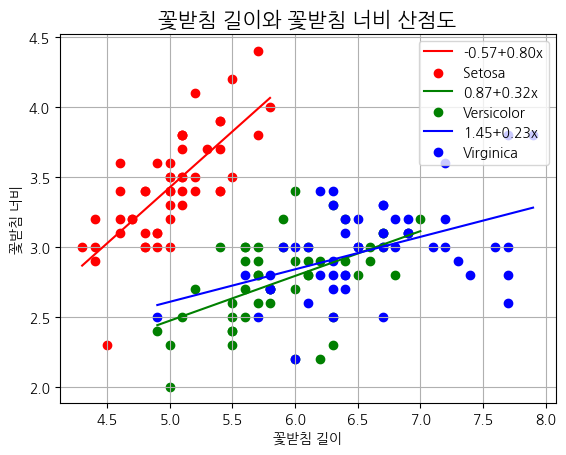

In [64]:
color = ["red", "green", "blue"]
i = 0
# 품종 => ['Setosa', 'Versicolor', 'Virginica']
for kind in df["variety"].unique():
    kind_df = df[df["variety"] == kind] # 각 종으로만 이루어진 df 생성

    # 직선 그래프
    poly_fit = np.polyfit(kind_df["sepal.length"], kind_df["sepal.width"], 1) # 계수 구하기
    poly_1d = np.poly1d(poly_fit)
    xs = np.linspace(kind_df["sepal.length"].min(), kind_df["sepal.length"].max())
    ys = poly_1d(xs)
    plt.plot(xs, ys, color=color[i], label=f"{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x")

    # scatter 그래프
    plt.scatter(kind_df["sepal.length"], kind_df["sepal.width"], color=color[i], label=kind)
    
    # X축에 레이블 부여
    plt.xlabel('꽃받침 길이')
    # Y축에 레이블 부여
    plt.ylabel('꽃받침 너비')
    
    i += 1
plt.grid()
plt.title(f"꽃받침 길이와 꽃받침 너비 산점도", fontsize = 15)
plt.legend()
plt.show()